<a href="https://colab.research.google.com/github/isabella-almeida-fernandes/analise-desempenho-alurastorebrasil/blob/main/An%C3%A1lise_de_Desempenho_AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [ ]:
# Adicionando uma coluna com valor fixo para identificar à qual loja o dado pertence quando juntar os dfs das lojas em um só
loja['Loja'] = 'Loja1'
loja2['Loja'] = 'Loja2'
loja3['Loja'] = 'Loja3'
loja4['Loja'] = 'Loja4'

In [ ]:
# Juntando os dataframes das 4 lojas em um dataframe só - Empilhando com o método de concatenação do Pandas (Consolidação):
df_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True) # O ignore_index=True vem para renumerar o índice de zero ao fim
df_lojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja1


In [ ]:
# Padronização dos valores referentes ao frete, arredondando para 2 valores decimais com round()
df_lojas['Frete'] = df_lojas['Frete'].round(2)
df_lojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.25,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja1
1,Mesa de jantar,moveis,256.35,11.23,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja1
2,Jogo de tabuleiro,brinquedos,279.51,21.26,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja1
3,Micro-ondas,eletrodomesticos,1009.99,54.67,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja1
4,Cadeira de escritório,moveis,446.99,26.96,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja1


In [ ]:
# Verificando se existem valores nulos (Nan) com isnull()
## Retornando "True" é porque existem valores nulos, retornando "False" é porque não existem valores nulos
df_lojas.isnull().values.any()

np.False_

#1. Análise do faturamento



In [ ]:
# Agrupando por "Loja" e selecionando "Preço" para somar os valores com sum()
faturamento_total = df_lojas.groupby('Loja')['Preço'].sum().reset_index()

print("--- 1. Faturamento Total por Loja ---")
print(faturamento_total)
print("\n")

--- 1. Faturamento Total por Loja ---
    Loja       Preço
0  Loja1  1534509.12
1  Loja2  1488459.06
2  Loja3  1464025.03
3  Loja4  1384497.58




* Loja com maior faturamento: Loja 1, com R$ 1.534.509,12

* Loja com menor faturamento: Loja 4, com R$ 1.384.497,58

# 2. Vendas por Categoria

In [ ]:
# Agrupando o dataframe principal pela loja e pela categoria
vendas_por_categoria = df_lojas.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Contagem')

# Ordenando do maior para o menor valor
vendas_por_categoria = vendas_por_categoria.sort_values(by=['Loja', 'Contagem'], ascending=[True, False])

print("--- 2. Vendas por Categoria e Loja ---")
print(vendas_por_categoria)
print("\n")

--- 2. Vendas por Categoria e Loja ---
     Loja   Categoria do Produto  Contagem
6   Loja1                 moveis       465
2   Loja1            eletronicos       448
0   Loja1             brinquedos       324
1   Loja1       eletrodomesticos       312
3   Loja1        esporte e lazer       284
4   Loja1  instrumentos musicais       182
5   Loja1                 livros       173
7   Loja1  utilidades domesticas       171
14  Loja2                 moveis       442
10  Loja2            eletronicos       422
8   Loja2             brinquedos       313
9   Loja2       eletrodomesticos       305
11  Loja2        esporte e lazer       275
12  Loja2  instrumentos musicais       224
13  Loja2                 livros       197
15  Loja2  utilidades domesticas       181
22  Loja3                 moveis       499
18  Loja3            eletronicos       451
16  Loja3             brinquedos       315
17  Loja3       eletrodomesticos       278
19  Loja3        esporte e lazer       277
21  Loja3      

In [ ]:
# Pegando as três primeiras categorias mais vendidas por loja com head()
mais_vendidos = vendas_por_categoria.groupby('Loja').head(3)

print("--- 2.1 Categorias Mais Populares por Loja ---")
print(mais_vendidos)
print("\n")

--- 2.1 Categorias Mais Populares por Loja ---
     Loja Categoria do Produto  Contagem
6   Loja1               moveis       465
2   Loja1          eletronicos       448
0   Loja1           brinquedos       324
14  Loja2               moveis       442
10  Loja2          eletronicos       422
8   Loja2           brinquedos       313
22  Loja3               moveis       499
18  Loja3          eletronicos       451
16  Loja3           brinquedos       315
30  Loja4               moveis       480
26  Loja4          eletronicos       451
24  Loja4           brinquedos       338




A categoria de produtos que mais vende em todas as lojas é a de móveis, seguida pelos eletrônicos e, em terceiro lugar, os brinquedos.

* Quem mais vende móveis é a Loja 3, com 499 vendas.

* Há empate numérico entre a Loja 3 e a Loja 4 quanto a quem mais vende eletrônicos, ambas com 451 vendas.

* E quem mais vende brinquedos é a Loja 4, com 338 vendas.

# 3. Média de Avaliação das Lojas


In [ ]:
# Agrupando por "Loja" e selecionando "Avaliação da compra" para calcular a média com mean()
media_avaliacao = df_lojas.groupby('Loja')['Avaliação da compra'].mean()

print("--- 3. Avaliação Média por Loja ---")
print(media_avaliacao.round(2)) # Arredondando o valor da média para padronizar e melhorar a visualização
print("\n")

--- 3. Avaliação Média por Loja ---
Loja
Loja1    3.98
Loja2    4.04
Loja3    4.05
Loja4    4.00
Name: Avaliação da compra, dtype: float64




* Menor média de avaliação: Loja 1, com 3.98

* Maior média de avaliação: Loja 3, com 4.05

* Segunda maior média de avaliação: Loja 2, com 4.04

* Terceira maior média (ou a segunda menor média): Loja 4, com 4.00

In [ ]:
# Utilizando count() para realizar a contagem do número de avaliações por loja
contagem_avaliacoes = df_lojas.groupby('Loja')['Avaliação da compra'].count()

print("--- 3.1 Número de avaliações por Loja ---")
print(contagem_avaliacoes)
print("\n")

--- 3.1 Número de avaliações por Loja ---
Loja
Loja1    2359
Loja2    2359
Loja3    2359
Loja4    2358
Name: Avaliação da compra, dtype: int64




* As lojas 1, 2 e 3 possuem 2359 avaliações de clientes

* A loja 4 possui 2358 avaliações de clientes, apenas uma avaliação a menos que as demais

# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Para os produtos mais vendidos: Agrupando por "Loja" e "Produto", realizando a contagem do número de ocorrências
vendas_produto = df_lojas.groupby(['Loja', 'Produto']).size().reset_index(name='Contagem')

# Ordenando do maior para o menor e mostrando os produtos mais vendidos
mais_vendidos = vendas_produto.sort_values(by=['Loja', 'Contagem'], ascending=[True, False])
produtos_mais_vendidos = mais_vendidos.groupby('Loja').head(3)

print("--- 4.1 Produtos Mais Vendidos por Loja ---")
print(produtos_mais_vendidos)
print("\n")

--- 4.1 Produtos Mais Vendidos por Loja ---
      Loja                   Produto  Contagem
24   Loja1             Guarda roupas        60
37   Loja1               Micro-ondas        60
47   Loja1             TV Led UHD 4K        60
79   Loja2  Iniciando em programação        65
88   Loja2               Micro-ondas        62
52   Loja2                   Bateria        61
134  Loja3             Kit banquetas        57
111  Loja3                 Cama king        56
138  Loja3            Mesa de jantar        56
161  Loja4                  Cama box        62
173  Loja4                  Faqueiro        59
162  Loja4                 Cama king        56




Os produtos mais vendidos em cada loja são:

* Loja 1 - Guarda-roupas (60), Micro-ondas (60) e TV Led UHD 4K (60)

* Loja 2 - Iniciando em programação (65), Micro-ondas (62) e Bateria (61)

* Loja 3 - Kit banquetas (57), Cama king (56) e Mesa de jantar (56)

* Loja 4 - Cama box (62), Faqueiro (59) e Cama king (56)

In [ ]:
# Para os produtos menos vendidos: Agrupando por "Loja" e "Produto", realizando a contagem do número de ocorrências
vendas_produto = df_lojas.groupby(['Loja', 'Produto']).size().reset_index(name='Contagem')

menos_vendidos = vendas_produto.sort_values(by=['Loja', 'Contagem'], ascending=[True, True]) # Ordenando do menor valor para o maior
produtos_menos_vendidos = menos_vendidos.groupby('Loja').head(3)

print("--- 4.2 Produtos Menos Vendidos por Loja ---")
print(produtos_menos_vendidos)
print("\n")

--- 4.2 Produtos Menos Vendidos por Loja ---
      Loja            Produto  Contagem
11   Loja1       Celular ABXY        33
26   Loja1            Headset        33
41   Loja1  Panela de pressão        35
82   Loja2  Jogo de tabuleiro        32
78   Loja2         Impressora        34
87   Loja2     Mesa de jantar        34
105  Loja3   Blocos de montar        35
131  Loja3      Jogo de copos        36
139  Loja3        Micro-ondas        36
178  Loja4           Guitarra        33
177  Loja4      Guarda roupas        34
202  Loja4             Violão        37




Os produtos menos vendidos em cada loja são:

* Loja 1 - Celular ABXY (33), Headset (33) e Panela de pressão (35)

* Loja 2 - Jogo de tabuleiro (32), Impressora (34) e Mesa de jantar (34)

* Loja 3 - Blocos de montar (35), Jogo de copos (36) e Micro-ondas (36)

* Loja 4 - Guitarra (33), Guarda roupas (34) e Violão (37)

# 5. Frete Médio por Loja

In [ ]:
# Agrupando por "Loja" e selecionando a coluna "Frete" para calcular a média com mean()
frete_medio = df_lojas.groupby('Loja')['Frete'].mean().reset_index()

print("--- 5. Custo Médio do Frete por Loja ---")
print(frete_medio.round(2))
print("\n")

--- 5. Custo Médio do Frete por Loja ---
    Loja  Frete
0  Loja1  34.69
1  Loja2  33.62
2  Loja3  33.07
3  Loja4  31.28




Conforme o cálculo, do maior para o menor, os valores de frete médio por loja são:

* Loja 1: R$ 34.69 (Loja com maior valor de frete)

* Loja 2: R$ 33.62

* Loja 3: R$ 33.07

* Loja 4: R$ 31.28 (Loja com o menor valor de frete)


# 6. Gráficos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

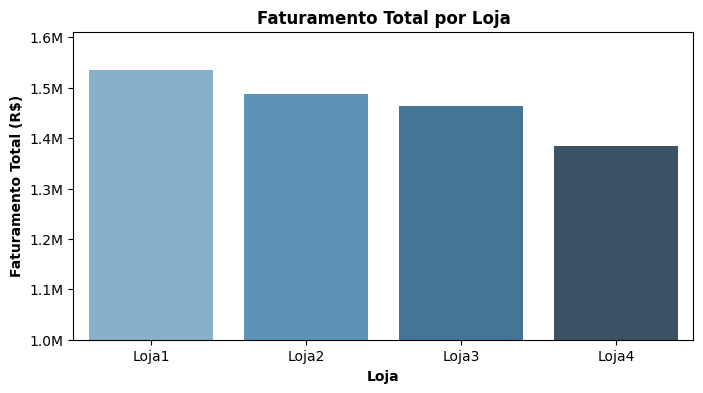

In [ ]:
# Análise do faturamento

## Plotando o gráfico

plt.figure(figsize=(8, 4))

sns.barplot(x='Loja', y='Preço', data=faturamento_total, palette='Blues_d', hue='Loja', legend=False)

## Criando uma função para formatar os valores do eixo y adicionando (M) para milhões

def formatar_milhoes(y, pos):
  return f'{y/1_000_000:.1f}M'

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatar_milhoes))

## Delimitando o início do eixo y em 1 milhão, não em zero

inicio = 1000000
plt.ylim(bottom=inicio)

## Plotando título e rótulos para os eixos

plt.title('Faturamento Total por Loja', fontweight='bold')
plt.xlabel('Loja', fontweight='bold')
plt.ylabel('Faturamento Total (R$)', fontweight='bold')

plt.show()

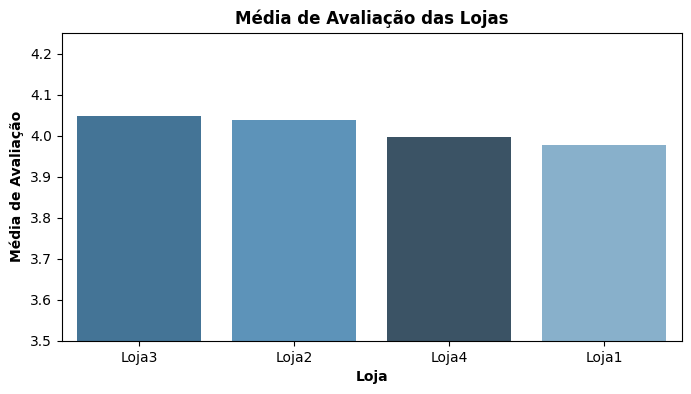

In [ ]:
# Média de avaliação dos clientes

## Ordenando as avaliações em ordem decrescente (da maior para a menor)

lojas_ordenadas = media_avaliacao.sort_values(ascending=False).index
df_media_avaliacao = media_avaliacao.reset_index()

## Plotando o gráfico com os valores ordenados

plt.figure(figsize=(8, 4))

sns.barplot(x='Loja', y='Avaliação da compra', data=df_media_avaliacao, palette='Blues_d', hue='Loja', legend=False, order=lojas_ordenadas)

## Estabelecendo o limite inicial do eixo y

inicio_eixo_y = 3.5
plt.ylim(bottom=inicio_eixo_y)

## Plotando título e rótulos para os eixos

plt.title('Média de Avaliação das Lojas', fontweight='bold')
plt.xlabel('Loja', fontweight='bold')
plt.ylabel('Média de Avaliação', fontweight='bold')

plt.show()

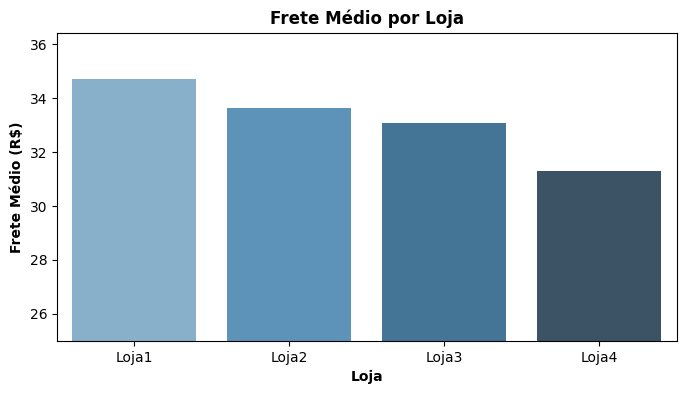

In [ ]:
# Frete médio por loja

## Plotando o gráfico com os valores médios de frete por loja

plt.figure(figsize=(8,4))

sns.barplot(x='Loja', y='Frete', data=frete_medio, palette='Blues_d', hue='Loja', legend=False)

## Estabelecendo o limite inicial do eixo y

eixo_y = 25
plt.ylim(bottom=eixo_y)

## Plotando título e rótulos para os eixos

plt.title('Frete Médio por Loja', fontweight='bold')
plt.xlabel('Loja', fontweight='bold')
plt.ylabel('Frete Médio (R$)', fontweight='bold')

plt.show()

# 7. Relatório

*7.1 Introdução*

Este relatório tem como objetivo analisar o desempenho das quatro lojas do Sr. João a partir de indicadores de faturamento, volume de vendas por categoria de produtos, avaliações de clientes, produtos mais e menos vendidos e frete médio. Ao final, apresenta-se uma recomendação sobre qual loja possui o menor desempenho e, portanto, é a mais indicada para fechamento.

*7.2 Faturamento por loja*

•	Loja 1: R$ 1.534.509,12 (maior faturamento)

•	Loja 4: R$ 1.384.497,58 (menor faturamento)

A Loja 1 destaca-se como a unidade com maior geração de receita, enquanto a Loja 4 apresenta o menor faturamento do grupo, configurando-se, inicialmente, como a operação menos eficiente sob a ótica financeira.


*7.3 Vendas por categoria de produtos*

As três categorias mais vendidas são as mesmas em todas as lojas, na mesma ordem de relevância:

1.	Móveis

2.	Eletrônicos

3.	Brinquedos

Em termos de volume:
•	Móveis: a Loja 3 lidera, com 499 vendas.

•	Eletrônicos: há empate entre Loja 3 e Loja 4, ambas com 451 vendas.

•	Brinquedos: a Loja 4 é a que mais vende, com 338 vendas.

Observa-se que a Loja 4 possui bom desempenho em volume de vendas em categorias relevantes (especialmente eletrônicos e brinquedos), porém isso não se converte em maior faturamento, o que indica possível ticket médio mais baixo, política de preços menos eficiente ou mix de produtos de menor valor agregado.

*7.4 Avaliações de clientes*

Médias de avaliação por loja:

•	Loja 3: 4,05 (maior média)

•	Loja 2: 4,04

•	Loja 4: 4,00

•	Loja 1: 3,98 (menor média)

Quantidade de avaliações:

•	Lojas 1, 2 e 3: 2.359 avaliações cada

•	Loja 4: 2.358 avaliações (apenas uma avaliação a menos)

As diferenças de média são pequenas, mas indicam que a Loja 1 tem a pior percepção de qualidade pelos clientes. Ainda assim, seu desempenho financeiro é o melhor entre as quatro lojas, o que sugere espaço para melhorias na experiência do cliente sem comprometer a receita.

*7.5 Produtos mais e menos vendidos*

Produtos mais vendidos:

•	Loja 1: Guarda-roupas, Micro-ondas, TV Led UHD 4K (todos com 60 unidades)

•	Loja 2: Iniciando em programação (65), Micro-ondas (62), Bateria (61)

•	Loja 3: Kit banquetas (57), Cama king (56), Mesa de jantar (56)

•	Loja 4: Cama box (62), Faqueiro (59), Cama king (56)

Produtos menos vendidos:

•	Loja 1: Celular ABXY (33), Headset (33), Panela de pressão (35)

•	Loja 2: Jogo de tabuleiro (32), Impressora (34), Mesa de jantar (34)

•	Loja 3: Blocos de montar (35), Jogo de copos (36), Micro-ondas (36)

•	Loja 4: Guitarra (33), Guarda-roupas (34), Violão (37)

A Loja 4 consegue destaque em alguns produtos de boa saída (como cama box e cama king), mas isso não é suficiente para alavancar seu faturamento geral ao nível das demais lojas.

*7.6 Frete médio por loja*

Do maior para o menor valor de frete médio:

•	Loja 1: R$ 34,69 (maior valor de frete)

•	Loja 2: R$ 33,62

•	Loja 3: R$ 33,07

•	Loja 4: R$ 31,28 (menor valor de frete)

A Loja 4 possui o menor custo médio de frete, o que, em tese, poderia ser uma vantagem competitiva. No entanto, mesmo com esse custo mais baixo, ela continua sendo a loja com menor faturamento, o que reforça uma dificuldade estrutural de conversão de vendas em receita.

*8. Síntese do desempenho e recomendação*

De forma consolidada:

•	**A Loja 1 apresenta o maior faturamento**, ainda que com a menor média de avaliação e o frete mais caro. Isso indica pontos de melhoria em satisfação do cliente e logística, mas não justifica seu fechamento, dado o forte resultado financeiro.

•	**As Lojas 2 e 3 mantêm boas médias de avaliação**, frete em patamar intermediário e não figuram como pior caso em nenhum dos principais indicadores.

•	**A Loja 4**, por sua vez, combina:

a) **Menor faturamento** entre as quatro lojas;

b) **Apenas a terceira melhor média de avaliação**, sem destaque relevante em satisfação;

c) **Bom volume de vendas em algumas categorias, mas sem retorno proporcional em receita;**

d) **Mesmo possuindo o menor frete médio, não consegue transformar essa possível vantagem em melhor desempenho financeiro.**

Diante desses fatores, conclui-se que **a Loja 4 apresenta o menor desempenho geral**, especialmente sob a ótica de faturamento, e não compensa esse resultado com vantagem significativa em avaliação de clientes ou outros indicadores.

Recomendação: com base na análise dos dados disponíveis, **recomenda-se o fechamento da Loja 4, por ser a unidade com desempenho global menos competitivo em relação às demais.**
